This is code taken out of tao-simple-mi; calculates things from POP

# Test xgcm

In [ ]:
grid = xgcm.Grid(cesm, periodic=False)
grid

<xgcm.Grid>
X Axis (not periodic):
  * center   nlon_t --> right
  * right    nlon_u --> center
Y Axis (not periodic):
  * center   nlat_t --> right
  * right    nlat_u --> center
Z Axis (not periodic):
  * center   z_t --> left
  * left     z_w --> center
  * outer    z_w_top --> center

In [ ]:
Tx = (grid.diff(cesm.temp, 'X', boundary='extend')
       / grid.interp(cesm.DXU, axis='Y', boundary='extend'))
Ty = (grid.diff(cesm.temp, 'Y', boundary='extend')
       / grid.interp(cesm.DYT, axis='Y', boundary='extend'))
# need negative sign on diff!
Tz = -(grid.diff(cesm.temp, 'Z', boundary='extend')
      / cesm.dzw)

# check continuity

Seeing resiudals of O(1e-9)

In [ ]:
ux = grid.diff(cesm.u, 'X', boundary='extend') / grid.interp(cesm.DXT, axis='Y', boundary='extend')
vy = grid.diff(cesm.v, 'Y', boundary='extend') / grid.interp(cesm.DYT, axis='X', boundary='extend')
wz = -grid.diff(cesm.w, 'Z', boundary='extend') / cesm.dz

In [ ]:
cont = (grid.interp(ux, 'Y', boundary='extend') + grid.interp(vy, 'X', boundary='extend') + wz)

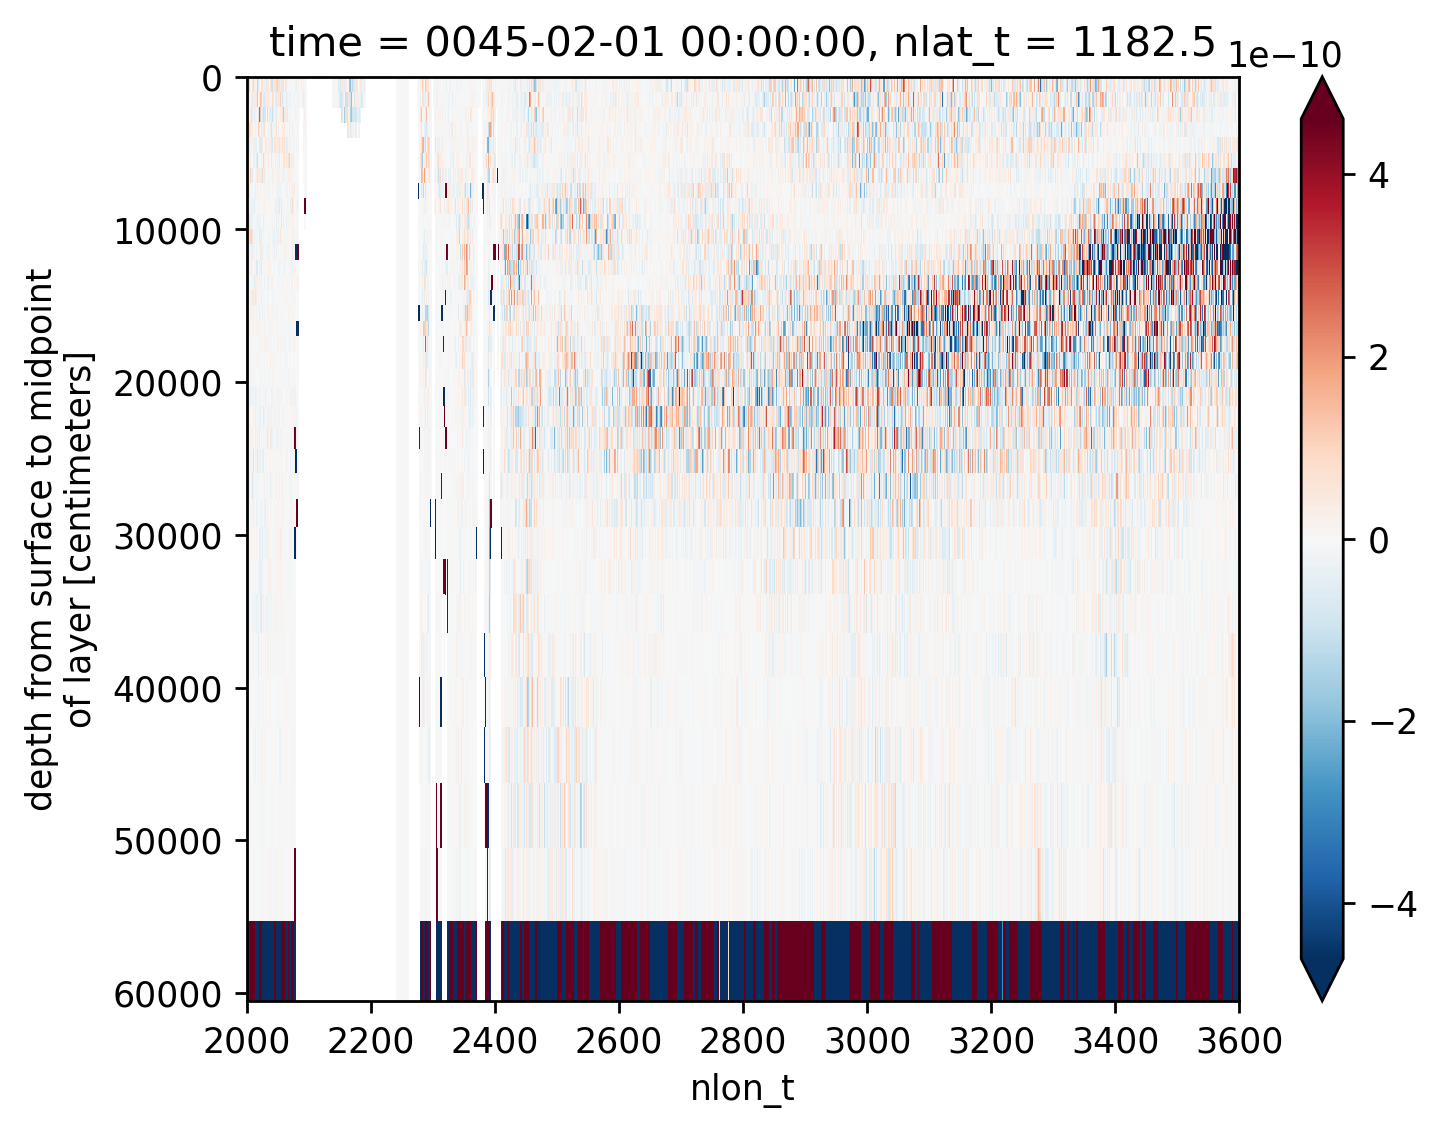

In [ ]:
cont.isel(time=0, nlat_t=62).plot(robust=True, yincrease=False)

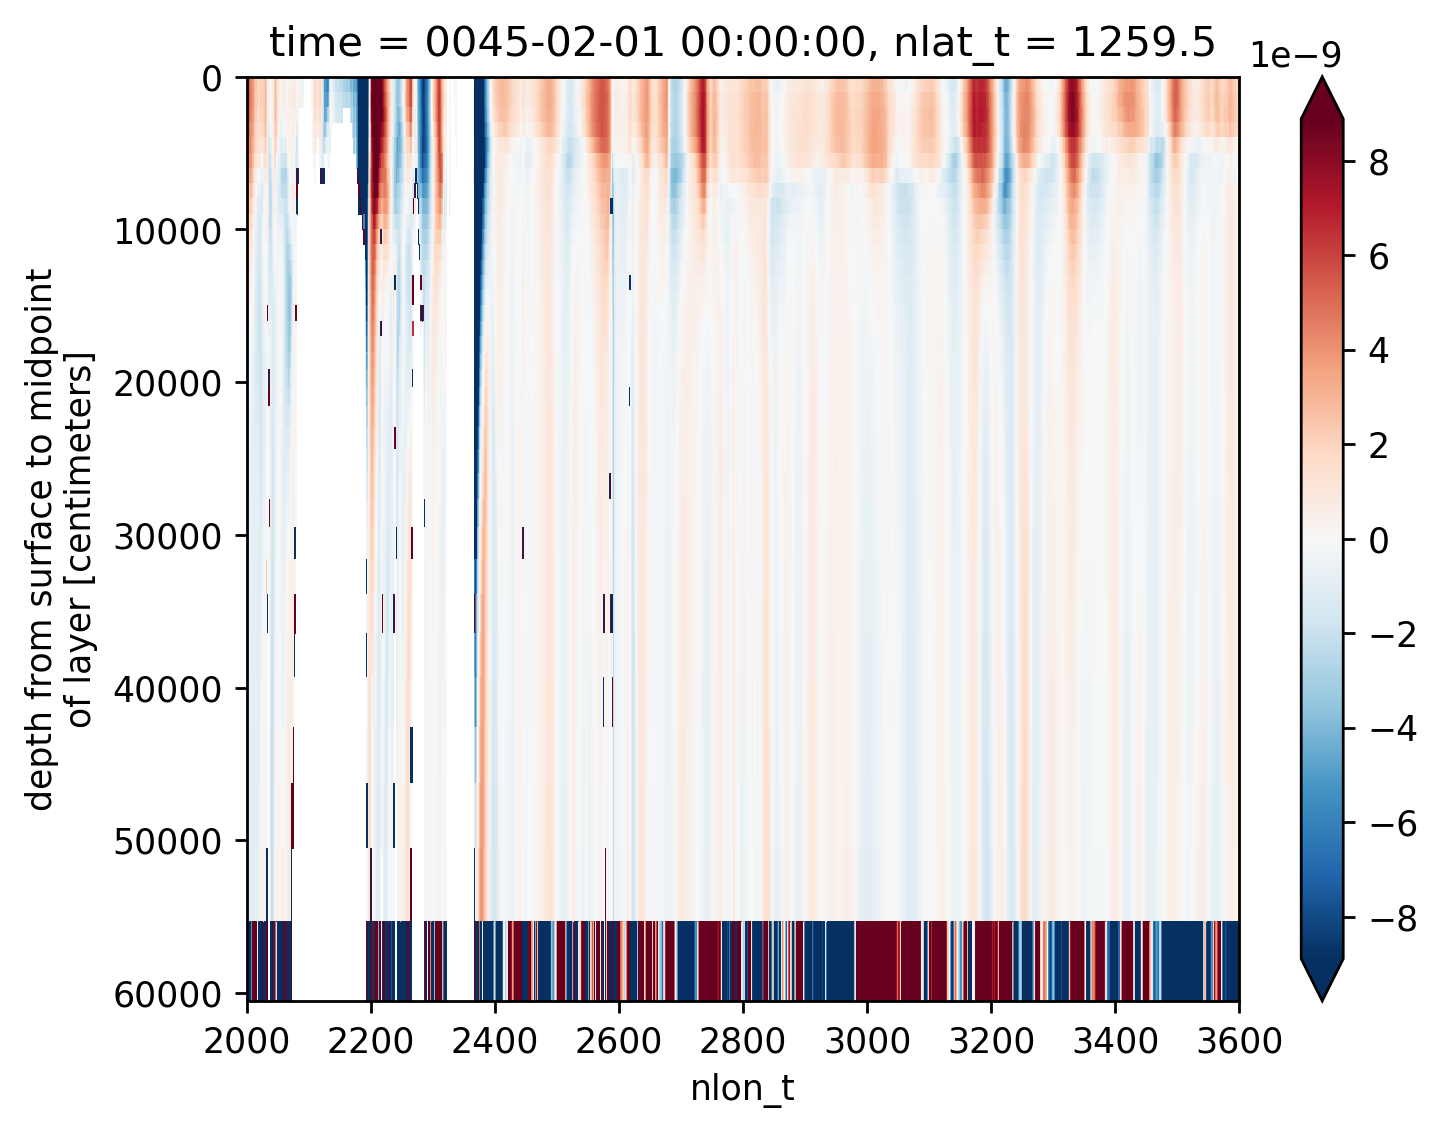

In [ ]:
cont.isel(time=0, nlat_t=-1).plot(robust=True, yincrease=False)

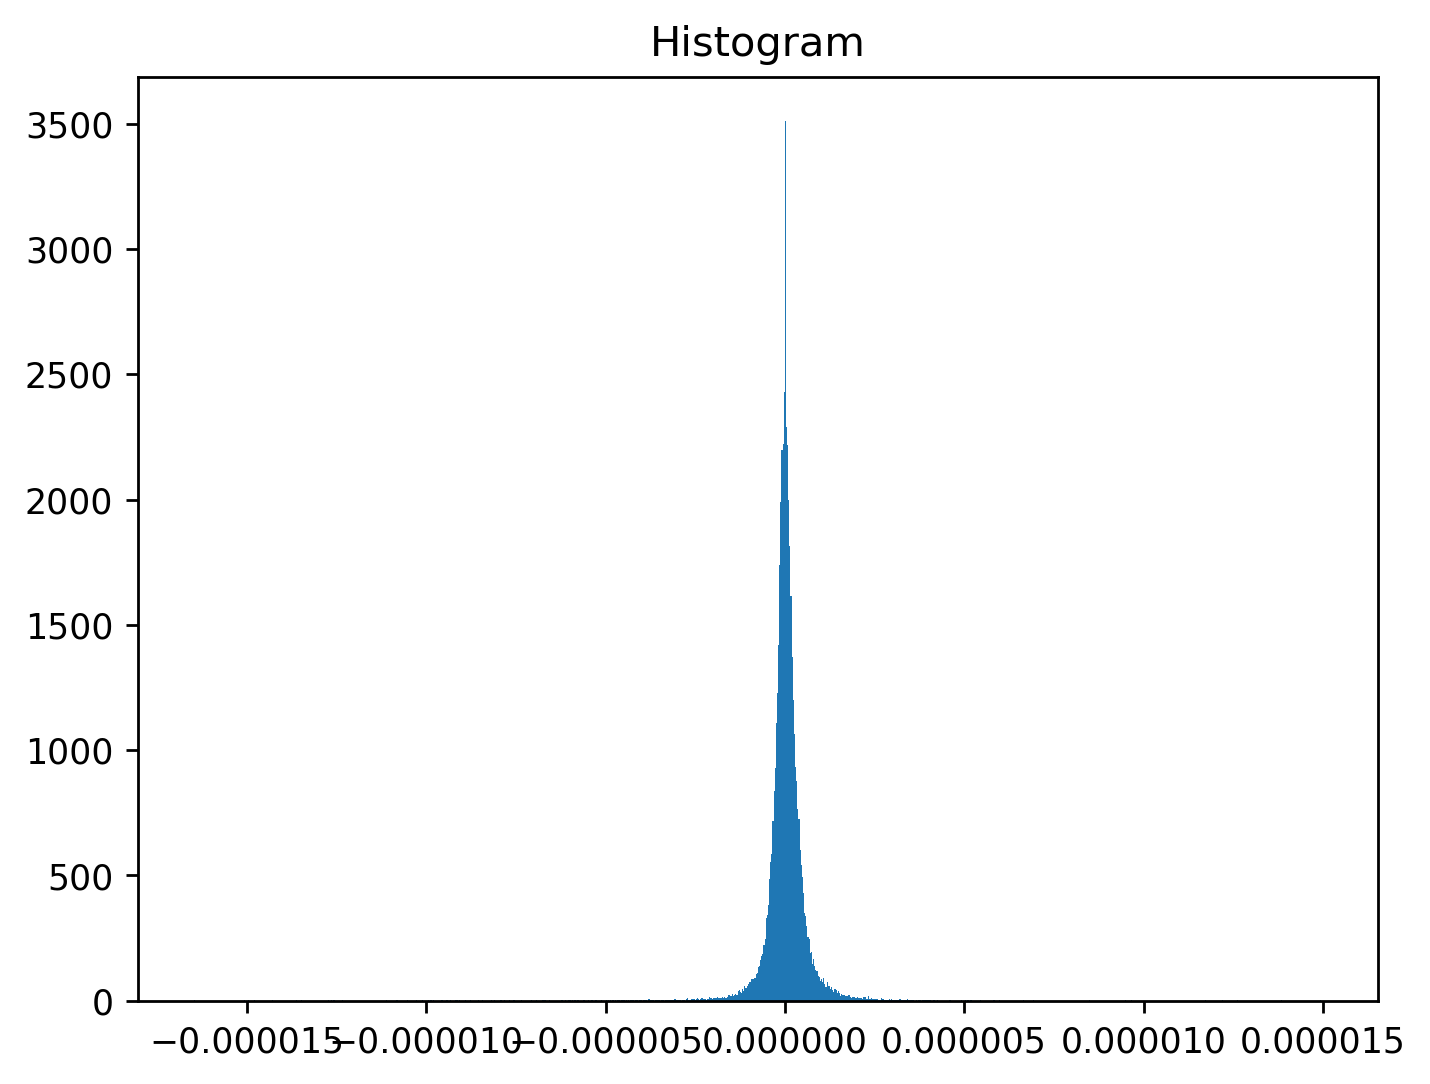

In [ ]:
ux.isel(time=0, nlat_u=62).plot.hist(bins=1000,);

# Diathermal velocity

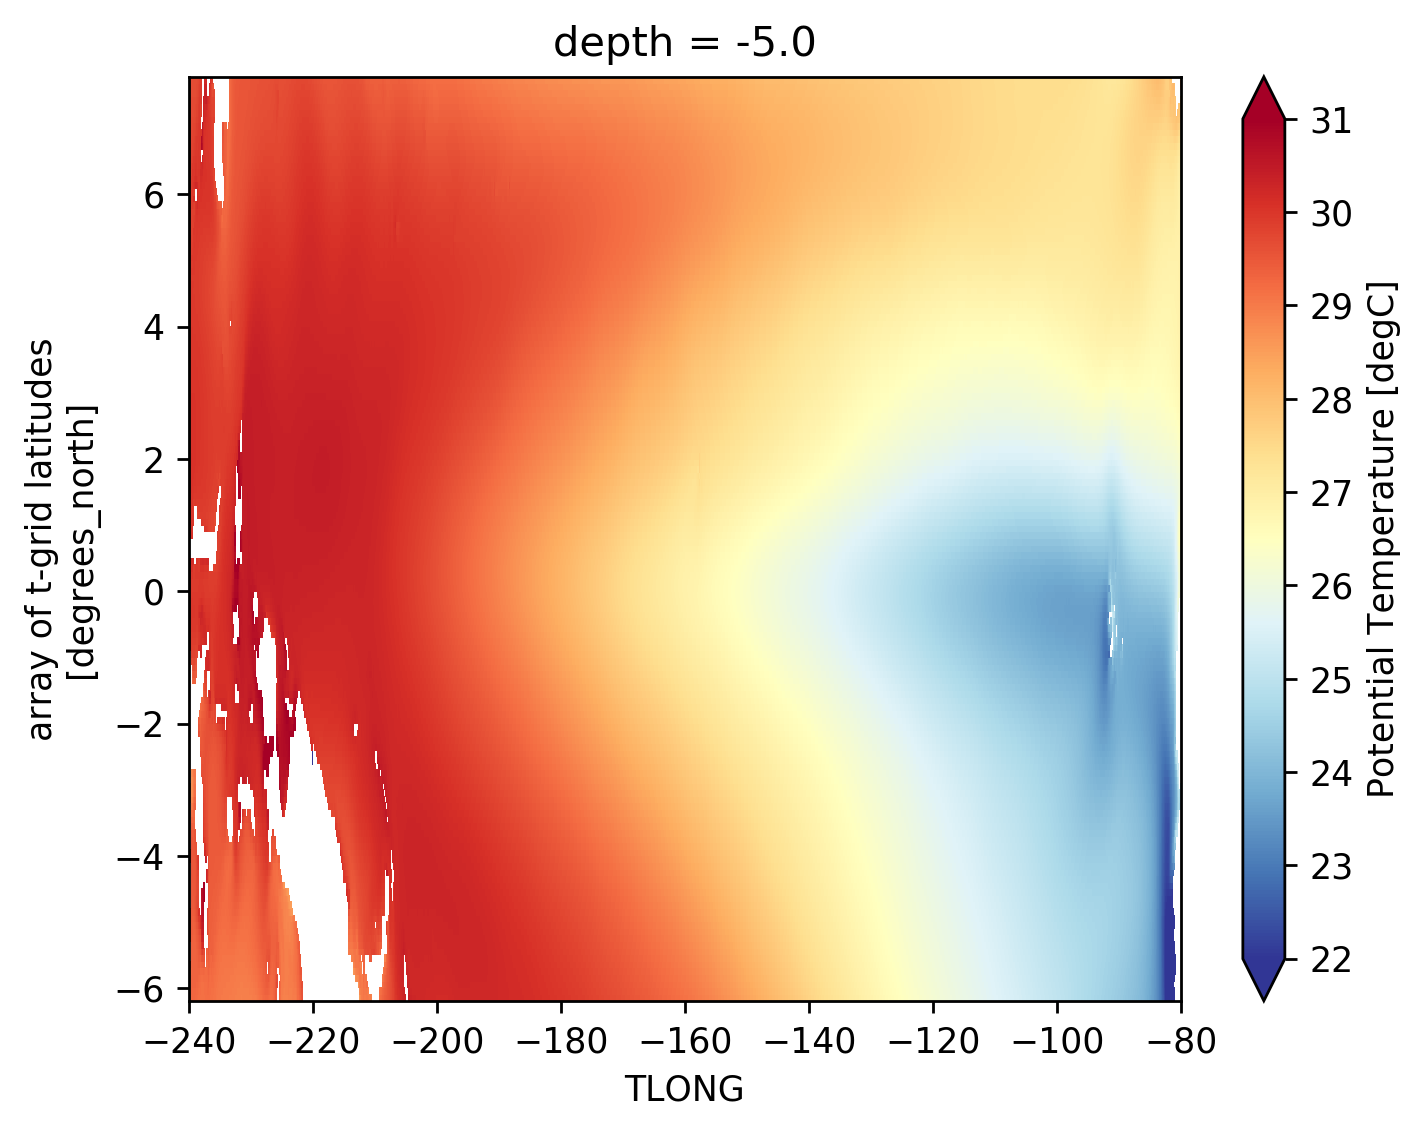

In [ ]:
#small['TLONG'] = small.TLONG.interpolate_na('nlon', method='nearest')
small.temp.isel(depth=0).plot(x='TLONG', y='TLAT', vmin=22, vmax=31, cmap=mpl.cm.RdYlBu_r)

\begin{equation}
w = \frac{u \cdot ∇T}{|∇T|}
\end{equation}

In [ ]:
cluster.adapt(minimum=2, maximum=24, wait_count=600)

In [ ]:
cluster.scale(24)

In [ ]:
import pump

cesm = pump.cesm.read_small()
cesm

ValueError: dimensions ['nlon'] do not exist

In [ ]:
cesm_eq = cesm.isel(nlat_t=62, nlat_u=62)
cesm_eq['TLONG'] = cesm_eq.TLONG.interpolate_na('nlon_t')
cesm_eq = cesm_eq.assign_coords(nlon_t=cesm_eq.TLONG, nlon_u=cesm_eq.ULONG).sel(nlon_t=slice(-240, None), nlon_u=slice(-240, None))
cesm_eq_mean = cesm_eq.mean('time').compute()

In [ ]:
cesm_eq_mean['eucmax'] = pump.calc.get_euc_max(cesm_eq_mean.u, 'z_t')
cesm_eq_mean

<xarray.Dataset>
Dimensions:             (nlon_t: 1300, nlon_u: 1301, z_t: 35, z_t_150m: 15, z_w: 35, z_w_bot: 36, z_w_top: 36)
Coordinates:
  * z_t                 (z_t) float32 500.0 1500.0 2500.0 ... 52772.8 57937.29
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 50370.688 55174.91
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 55174.91 60699.668
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 60699.668 67072.86
    ULONG               (nlon_u) float64 -240.0 -239.9 -239.8 ... -110.1 -110.0
    ULAT                (nlon_u) float64 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    TLONG               (nlon_t) float64 -240.0 -239.8 -239.8 ... -110.2 -110.1
    TLAT                (nlon_t) float64 0.05 0.05 0.05 0.05 ... 0.05 0.05 0.05
  * nlon_u              (nlon_u) float64 -240.0 -239.9 -239.8 ... -110.1 -110.0
    nlat_u              int64 1183
  * nlon_t              (nlon_t) f

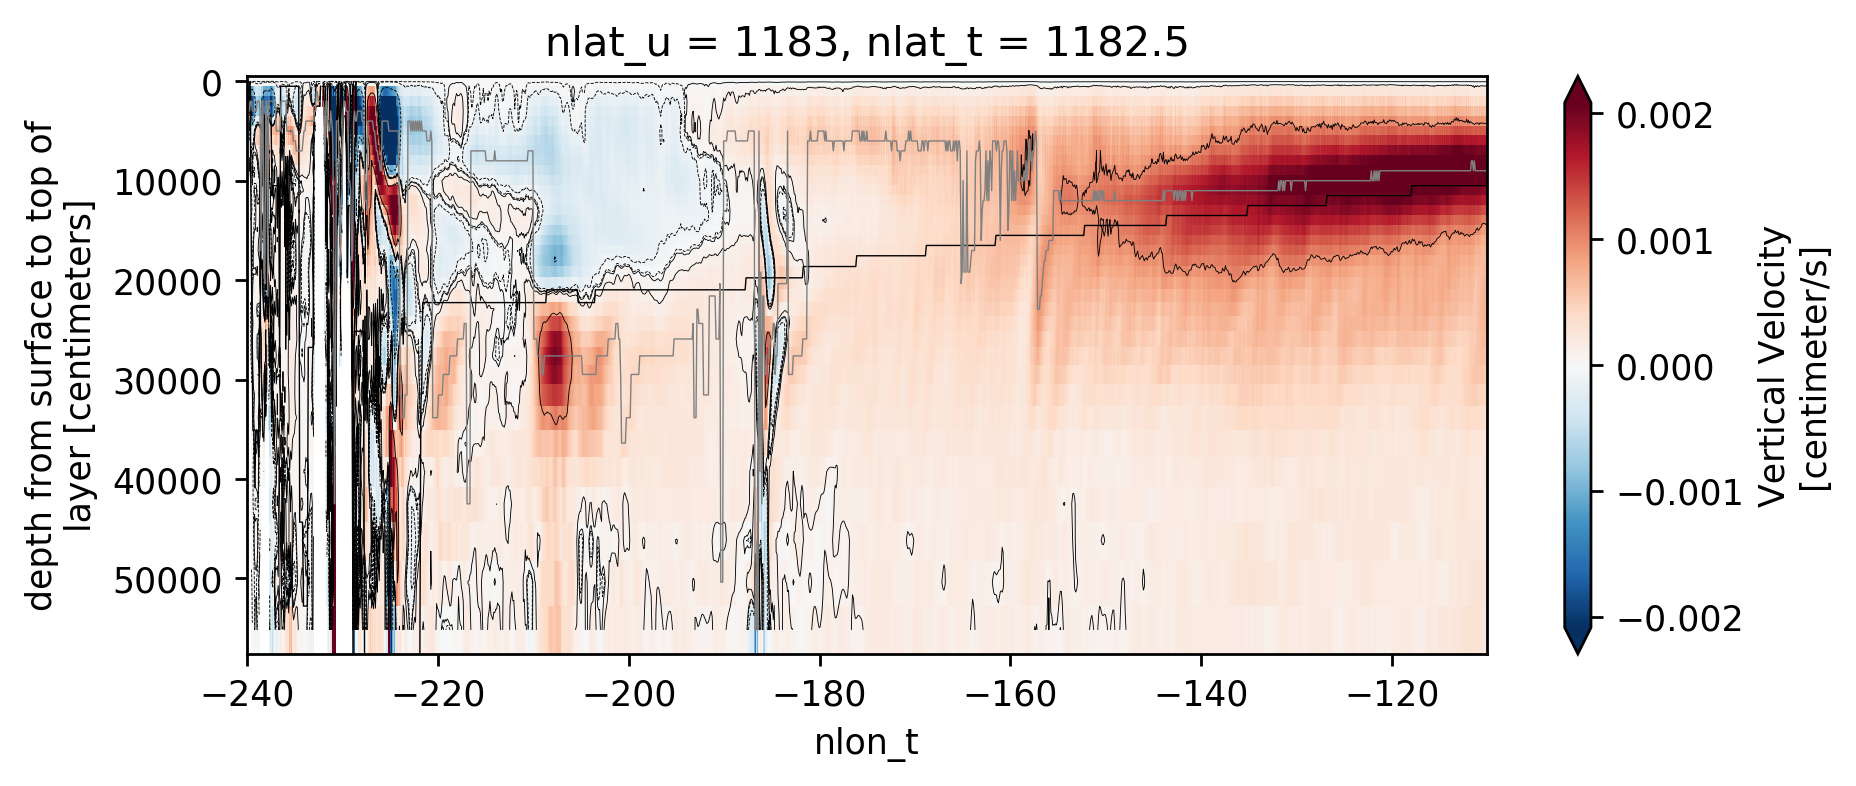

In [ ]:
cesm_eq_mean.w.plot(robust=True, yincrease=False)
cesm_eq_mean.w.plot.contour(levels=np.sort([-1e-5, -1e-4, -1e-3, 1e-3, 1e-4, 1e-5]), colors='k', linewidths=0.25, yincrease=False)
cesm_eq_mean.eucmax.plot(color='k', linewidth=0.4)
pump.calc._get_max(np.abs(cesm_eq_mean.w), "z_w").plot(color='gray', linewidth=0.4)
plt.gcf().set_size_inches((8, 3))

In [ ]:
cesm_eq_mean.eucmax.bfill('nlon_u')

<xarray.DataArray 'eucmax' (nlon_u: 1301)>
array([  500.,   500.,   500., ..., 10500., 10500., 10500.], dtype=float32)
Coordinates:
    ULONG    (nlon_u) float64 -240.0 -239.9 -239.8 ... -110.2 -110.1 -110.0
    ULAT     (nlon_u) float64 0.1 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1 0.1
  * nlon_u   (nlon_u) float64 -240.0 -239.9 -239.8 ... -110.2 -110.1 -110.0
    nlat_u   int64 1183
    nlat_t   float64 1.182e+03
Attributes:
    long_name:  Depth of EUC max
    units:      m
    positive:   down
    valid_min:  500.0
    valid_max:  587499.06
    axis:       Z

In [ ]:
cesm_eq_mean.eucmax.bfill('nlon_u').rename({'nlon_u': 'nlon_t'})

<xarray.DataArray 'eucmax' (nlon_t: 1301)>
array([  500.,   500.,   500., ..., 10500., 10500., 10500.], dtype=float32)
Coordinates:
    ULONG    (nlon_t) float64 -240.0 -239.9 -239.8 ... -110.2 -110.1 -110.0
    ULAT     (nlon_t) float64 0.1 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1 0.1
  * nlon_t   (nlon_t) float64 -240.0 -239.9 -239.8 ... -110.2 -110.1 -110.0
    nlat_u   int64 1183
    nlat_t   float64 1.182e+03
Attributes:
    long_name:  Depth of EUC max
    units:      m
    positive:   down
    valid_min:  500.0
    valid_max:  587499.06
    axis:       Z

In [ ]:
cesm_eq_mean.eucmax.bfill('nlon_u').rename({'nlon_u': 'nlon_t'})

<xarray.DataArray 'eucmax' (nlon_t: 1301)>
array([  500.,   500.,   500., ..., 10500., 10500., 10500.], dtype=float32)
Coordinates:
    ULONG    (nlon_t) float64 -240.0 -239.9 -239.8 ... -110.2 -110.1 -110.0
    ULAT     (nlon_t) float64 0.1 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1 0.1
  * nlon_t   (nlon_t) float64 -240.0 -239.9 -239.8 ... -110.2 -110.1 -110.0
    nlat_u   int64 1183
    nlat_t   float64 1.182e+03
Attributes:
    long_name:  Depth of EUC max
    units:      m
    positive:   down
    valid_min:  500.0
    valid_max:  587499.06
    axis:       Z

## anna's xgcm estimate

In [ ]:
orig = xr.open_mfdataset(
    "/glade/p/cesm/community/ASD-HIGH-RES-CESM1/hybrid_v5_rel04_BC5_ne120_t12_pop62/"
    "ocn/proc/tseries/monthly/*.nc",
    parallel=True,
    concat_dim="time",
    coords="minimal",
    combine="_old_auto",
    data_vars="minimal",
    compat="override",
).sortby("time")

/glade/u/home/dcherian/miniconda3/envs/dcpy/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  if __name__ == '__main__':
/gpfs/u/home/dcherian/python/xarray/xarray/backends/api.py:933: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplie

In [ ]:
orig

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 504, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0045-02-01 00:00:00 ... 0087-01-01 00:00:00
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    sound               float64 0.0
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    latent_heat_fusion  float64 0.0
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    hflux_factor        float64 0.0
    heat_to_PW          float64 0.0
    nsurface_u          float64 0.0
    fwflux_factor       float64 0.0
    HUW                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUS                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    latent_heat_vapor   float64 0.0
    days_in_norm_year   timedelta64[ns] 00:00:00
    sflux_factor        float64 0.0
    vonkar              float64 0.0
    cp_sw               float64 0.0
    rho_fw              float64 0.0
    sea_ice_salinity    float64 0.0
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    salt_to_mmday       float64 0.0
    HU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    omega               float64 0.0
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTE                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    stefan_boltzmann    float64 0.0
    salinity_factor     float64 0.0
    momentum_factor     float64 0.0
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HT                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    salt_to_Svppt       float64 0.0
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    T0_Kelvin           float64 0.0
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    cp_air              float64 0.0
    HTN                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    nsurface_t          float64 0.0
    rho_air             float64 0.0
    mass_to_Sv          float64 0.0
    TAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ppt_to_salt         float64 0.0
    UAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ocn_ref_salinity    float64 0.0
    grav                float64 0.0
    rho_sw              float64 0.0
    salt_to_ppt         float64 0.0
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    radius              float64 0.0
    time_bound  

In [ ]:
grid, ds_ren = pop_tools.to_xgcm_grid_dataset(orig)
ds_ren

<xarray.Dataset>
Dimensions:             (d2: 2, nlat_t: 2400, nlat_u: 2400, nlon_t: 3600, nlon_u: 3600, time: 504, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0045-02-01 00:00:00 ... 0087-01-01 00:00:00
    ULAT                (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULONG               (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG               (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
  * nlon_u              (nlon_u) int64 1 2 3 4 5 6 ... 3596 3597 3598 3599 3600
  * nlat_u              (nlat_u) int64 1 2 3 4 5 6 ... 2396 2397 2398 2399 2400
  * nlon_t              (nlon_t) float64 0.5 1.5 2.5 ... 3.598e+03 3.6e+03
  * nlat_t              (nlat_t) float64 0.5 1.5 2.5 ... 2.398e+03 2.4e+03
Dimensions without coordinates: d2
Data variables:
    sound               float64 0.0
    DYU                 (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    latent_heat_fusion  float64 0.0
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    hflux_factor        float64 0.0
    heat_to_PW          float64 0.0
    nsurface_u          float64 0.0
    fwflux_factor       float64 0.0
    HUW                 (nlat_u, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUS                 (nlat_t, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    latent_heat_vapor   float64 0.0
    days_in_norm_year   timedelta64[ns] 00:00:00
    sflux_factor        float64 0.0
    vonkar              float64 0.0
    cp_sw               float64 0.0
    rho_fw              float64 0.0
    sea_ice_salinity    float64 0.0
    DXT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    salt_to_mmday       float64 0.0
    HU                  (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    REGION_MASK         (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    omega               float64 0.0
    DXU                 (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTE                 (nlat_t, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    stefan_boltzmann    float64 0.0
    salinity_factor     float64 0.0
    momentum_factor     float64 0.0
    KMU                 (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HT                  (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    salt_to_Svppt       float64 0.0
    ANGLET              (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    T0_Kelvin           float64 0.0
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    cp_air              float64 0.0
    HTN                 (nlat_u, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    nsurface_t          float64 0.0
    rho_air             float64 0.0
    mass_to_Sv          float64 0.0
    TAREA               (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ppt_to_salt     

In [ ]:
# make grid info file with DZT DZU CELL_VOLUME
def to_index(ds):
    ds = ds.copy()
    for dim in ds.dims:
        if dim in ["nlon_t", "nlat_t", "nlon_u", "nlat_u"]:
            ds = ds.drop(dim).rename({dim: dim[:-2]})
    return ds


def to_coord(ds, lon, lat):
    return ds.rename({"nlon": "nlon_" + lon, "nlat": "nlat_" + lat})


ds_ren["cell_volume"] = ds_ren.dz * ds_ren.DXT * ds_ren.DYT
dsi = to_index(ds_ren)
ds_ren["vol_uet"] = to_coord(dsi.cell_volume * dsi.UET, "t", "t")
ds_ren
# ds_ren = ds_ren.where(ds_ren <= 1e20)

<xarray.Dataset>
Dimensions:             (d2: 2, nlat_t: 2400, nlat_u: 2400, nlon_t: 3600, nlon_u: 3600, time: 504, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * nlat_t              (nlat_t) float64 0.5 1.5 2.5 ... 2.398e+03 2.4e+03
  * nlon_t              (nlon_t) float64 0.5 1.5 2.5 ... 3.598e+03 3.6e+03
  * time                (time) object 0045-02-01 00:00:00 ... 0087-01-01 00:00:00
    ULAT                (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULONG               (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG               (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
  * nlon_u              (nlon_u) int64 1 2 3 4 5 6 ... 3596 3597 3598 3599 3600
  * nlat_u              (nlat_u) int64 1 2 3 4 5 6 ... 2396 2397 2398 2399 2400
Dimensions without coordinates: d2
Data variables:
    sound               float64 0.0
    DYU                 (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    latent_heat_fusion  float64 0.0
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    hflux_factor        float64 0.0
    heat_to_PW          float64 0.0
    nsurface_u          float64 0.0
    fwflux_factor       float64 0.0
    HUW                 (nlat_u, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUS                 (nlat_t, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    latent_heat_vapor   float64 0.0
    days_in_norm_year   timedelta64[ns] 00:00:00
    sflux_factor        float64 0.0
    vonkar              float64 0.0
    cp_sw               float64 0.0
    rho_fw              float64 0.0
    sea_ice_salinity    float64 0.0
    DXT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    salt_to_mmday       float64 0.0
    HU                  (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    REGION_MASK         (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    omega               float64 0.0
    DXU                 (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTE                 (nlat_t, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    stefan_boltzmann    float64 0.0
    salinity_factor     float64 0.0
    momentum_factor     float64 0.0
    KMU                 (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HT                  (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    salt_to_Svppt       float64 0.0
    ANGLET              (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    T0_Kelvin           float64 0.0
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    cp_air              float64 0.0
    HTN                 (nlat_u, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    nsurface_t          float64 0.0
    rho_air             float64 0.0
    mass_to_Sv          float64 0.0
    TAREA               (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ppt_to_salt     

In [ ]:
dsi_back = dsi.copy()

In [ ]:
dsi = dsi.isel(time=slice(5))

In [ ]:
%%time

gradTz_own = np.zeros_like(dsi.TEMP)

gradTz_own[:, 0, :, :] = (dsi.TEMP[:, 0, :, :] - dsi.TEMP[:, 1, :, :]) / dsi.dzw.isel(
    z_w_top=0, time=0
)

for k in range(1, 61):
    gradTz_own[:, k, :, :] = 0.5 * (
        (dsi.TEMP.isel(z_t=(k - 1)) - dsi.TEMP.isel(z_t=k))
        / dsi.dzw.isel(z_w_top=k - 1, time=0).values
        + (dsi.TEMP.isel(z_t=k) - dsi.TEMP.isel(z_t=k + 1))
        / dsi.dzw.isel(z_w_top=k, time=0).values
    )

gradTz = xr.DataArray(
    gradTz_own,
    coords=[ds_ren.time, ds_ren.z_t, dsi.nlat, dsi.nlon],
    dims=["time", "z_t", "nlat", "nlon"],
)


KeyboardInterrupt: 

In [ ]:
gradTz_level0 = (((ds_ren.TEMP[:, 0, :, :] - ds_ren.TEMP[:, 1, :, :])
      / ds_ren.dzw.isel(z_w=0))
     .expand_dims(z_t=[ds_ren.z_t.isel(z_t=0)]))

gradTz_rest = (grid.interp(
        grid.diff(ds_ren.TEMP, 'Z', boundary="extend"), 
        'Z', boundary="extend")
     .isel(z_t=slice(1,None)))

gradTz = xr.concat([gradTz_level0, gradTz_rest], 
                   dim="z_t", 
                   coords="minimal", 
                   compat="override")
gradTz

<xarray.DataArray (z_t: 62, time: 504, nlat_t: 2400, nlon_t: 3600)>
dask.array<concatenate, shape=(62, 504, 2400, 3600), dtype=float32, chunksize=(60, 12, 2400, 3600), chunktype=numpy.ndarray>
Coordinates:
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    z_w      float32 0.0
  * nlon_t   (nlon_t) float64 0.5 1.5 2.5 3.5 ... 3.598e+03 3.598e+03 3.6e+03
  * time     (time) object 0045-02-01 00:00:00 ... 0087-01-01 00:00:00
  * nlat_t   (nlat_t) float64 0.5 1.5 2.5 3.5 ... 2.398e+03 2.398e+03 2.4e+03
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05

In [ ]:
dT = dsi.TEMP.diff("z_t") / dsi.dzw
dT.isel(z_t=slice(None, -1))/dsi.dzw.isel(z_t)

<xarray.DataArray 'TEMP' (time: 5, z_t: 61, nlat: 2400, nlon: 3600)>
dask.array<sub, shape=(5, 61, 2400, 3600), dtype=float32, chunksize=(5, 61, 2400, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0045-02-01 00:00:00 ... 0045-06-01 00:00:00
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
  * z_t      (z_t) float32 1500.0 2500.0 3500.0 ... 537500.0 562499.06 587499.06
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

In [ ]:
gradTz_own = xr.zeros_like(dsi.TEMP)

gradTz_own = gradTz

gradTz_own[:, 0, :, :] = (dsi.TEMP[:, 0, :, :] - dsi.TEMP[:, 1, :, :]) / dsi.dzw.isel(
    z_w_top=0, time=0
)

for k in range(1, 61):
    gradTz_own[:, k, :, :] = 0.5 * (
        (dsi.TEMP.isel(z_t=(k - 1)) - dsi.TEMP.isel(z_t=k))
        / dsi.dzw.isel(z_w_top=k - 1, time=0).values
        + (dsi.TEMP.isel(z_t=k) - dsi.TEMP.isel(z_t=k + 1))
        / dsi.dzw.isel(z_w_top=k, time=0).values
    )

gradTz = xr.DataArray(
    gradTz_own,
    coords=[ds_ren.time, ds_ren.z_t, dsi.nlat, dsi.nlon],
    dims=["time", "z_t", "nlat", "nlon"],
)

In [ ]:
gradTx = 0.5 * (
    (dsi.TEMP.roll(nlon=1, roll_coords=False) - dsi.TEMP) / dsi.HUS
    + (dsi.TEMP - dsi.TEMP.roll(nlon=-1, roll_coords=False))
    / dsi.HUS.roll(nlon=-1, roll_coords=False)
)

gradTy = 0.5 * (
    (dsi.TEMP.roll(nlat=1, roll_coords=False) - dsi.TEMP) / dsi.HUW
    + (dsi.TEMP - dsi.TEMP.roll(nlat=-1, roll_coords=False))
    / dsi.HUW.roll(nlat=-1, roll_coords=False)
)

maggradT = np.sqrt(gradTx ** 2 + gradTy ** 2 + to_index(gradTz) ** 2)

KeyboardInterrupt: 

## xgcm estimate

In [ ]:
%matplotlib inline
%autoreload 0

import dask
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seawater as sw
import xarray as xr
%aimport xgcm

orig = xr.open_mfdataset(
    "/glade/p/cesm/community/ASD-HIGH-RES-CESM1/hybrid_v5_rel04_BC5_ne120_t12_pop62/"
    "ocn/proc/tseries/monthly/*TEMP*",
    concat_dim="time",
    coords="minimal",
    data_vars="minimal",
    compat="override",
)

/glade/u/home/dcherian/miniconda3/envs/dcpy/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/gpfs/u/home/dcherian/python/xarray/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the 

In [ ]:
# setup xgcm

# cesm = xr.open_dataset("../glade/small-eq-mean.nc")

from modify_pop_for_xgcm import relabel_pop_dims

cesm = relabel_pop_dims(orig.copy(deep=True))

grid = xgcm.Grid(cesm, periodic=False)
grid

<xgcm.Grid>
Z Axis (not periodic):
  * center   z_t --> left
  * left     z_w_top --> center
  * right    z_w_bot --> center
Y Axis (not periodic):
  * center   nlat_t --> right
  * right    nlat_u --> center
X Axis (not periodic):
  * center   nlon_t --> right
  * right    nlon_u --> center

In [ ]:
grid.shift(cesm.TEMP, axis="X", to="right")

<xarray.DataArray 'concatenate-280c651281e28049b0dab2016e0fe002' (time: 504, z_t: 62, nlat_t: 2400, nlon_u: 3600)>
dask.array<concatenate, shape=(504, 62, 2400, 3600), dtype=float32, chunksize=(12, 62, 2400, 3600)>
Coordinates:
  * time     (time) object 0045-02-01 00:00:00 ... 0087-01-01 00:00:00
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 537500.0 562499.06 587499.06
  * nlat_t   (nlat_t) float64 0.5 1.5 2.5 3.5 ... 2.398e+03 2.398e+03 2.4e+03
  * nlon_u   (nlon_u) int64 1 2 3 4 5 6 7 ... 3594 3595 3596 3597 3598 3599 3600

In [ ]:
position_to="right"

axis = grid.axes["X"]

axis._wrap_and_replace_coords(cesm.TEMP, cesm.TEMP.data, position_to="right")

In [ ]:
axis.coords

OrderedDict([('center', 'nlon_t'), ('right', 'nlon_u')])

In [ ]:
position_from, old_dim = axis._get_axis_coord(cesm.TEMP)
new_dim = axis.coords[position_to]



'nlon_u'

In [ ]:
# grid.diff differences and changes coordinates appropriately
# grid.interp moves from center to edge or vice versa

Tx = (grid.diff(cesm.temp, 'X')
       / grid.interp(cesm.DXT, axis='X', boundary='extend'))
Ty = (grid.diff(cesm.temp, 'Y', boundary='extend')
       / grid.interp(cesm.DYT, axis='Y', boundary='extend'))
# need negative sign on gradient!
Tz = -(grid.diff(cesm.temp, 'Z', boundary='extend')
      / cesm.dzw)

uTx = (grid.interp(cesm.u, axis='Y', boundary='extend') * Tx)
vTy = (grid.interp(cesm.v, axis='X', boundary='extend') * Ty)
wTz = grid.interp(cesm.w * Tz, 'Z', boundary='extend')

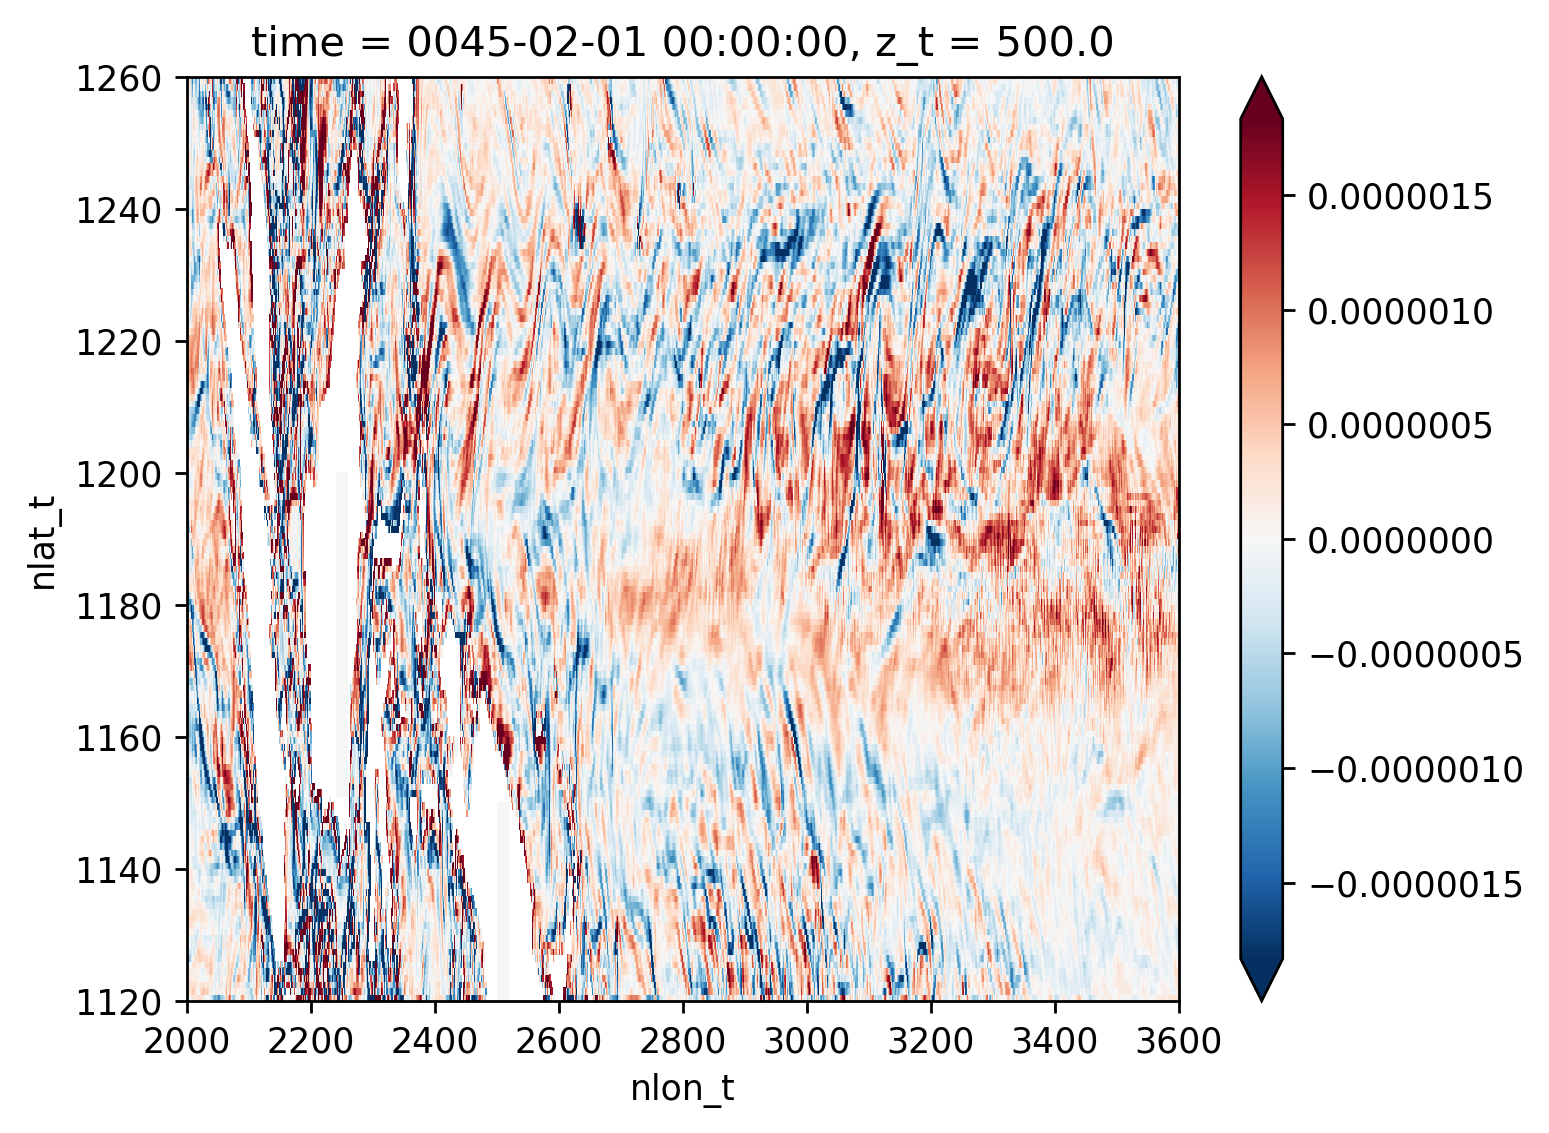

In [ ]:
(grid.interp(ux, 'Y', boundary='extend') + grid.interp(vy, 'X', boundary='extend')).isel(time=0, z_t=0).plot(robust=True)

In [ ]:
wd = ((grid.interp(uTx, 'X', boundary='extend')
      + grid.interp(vTy, 'Y', boundary='extend')
      + wTz)
      /
      (np.sqrt(grid.interp(Tx**2, 'X', boundary='extend')
               + grid.interp(Ty**2, 'Y', boundary='extend')
               + grid.interp(Tz**2, 'Z', boundary='extend'))))

wd = wd.assign_coords(TLONG=cesm.TLONG, TLAT=cesm.TLAT)

In [ ]:
wd_eq = wd.isel(nlat_t=62).compute()
wd_eq.to_netcdf('diatermal-w-hires-equator.nc')

In [ ]:
wd_eq = xr.load_dataarray('diatermal-w-hires-equator.nc')

In [ ]:
wd_eq['TLONG'] = wd_eq.TLONG.interpolate_na('nlon_t')
wd_eq = wd_eq.assign_coords(nlon_t=wd_eq.TLONG)

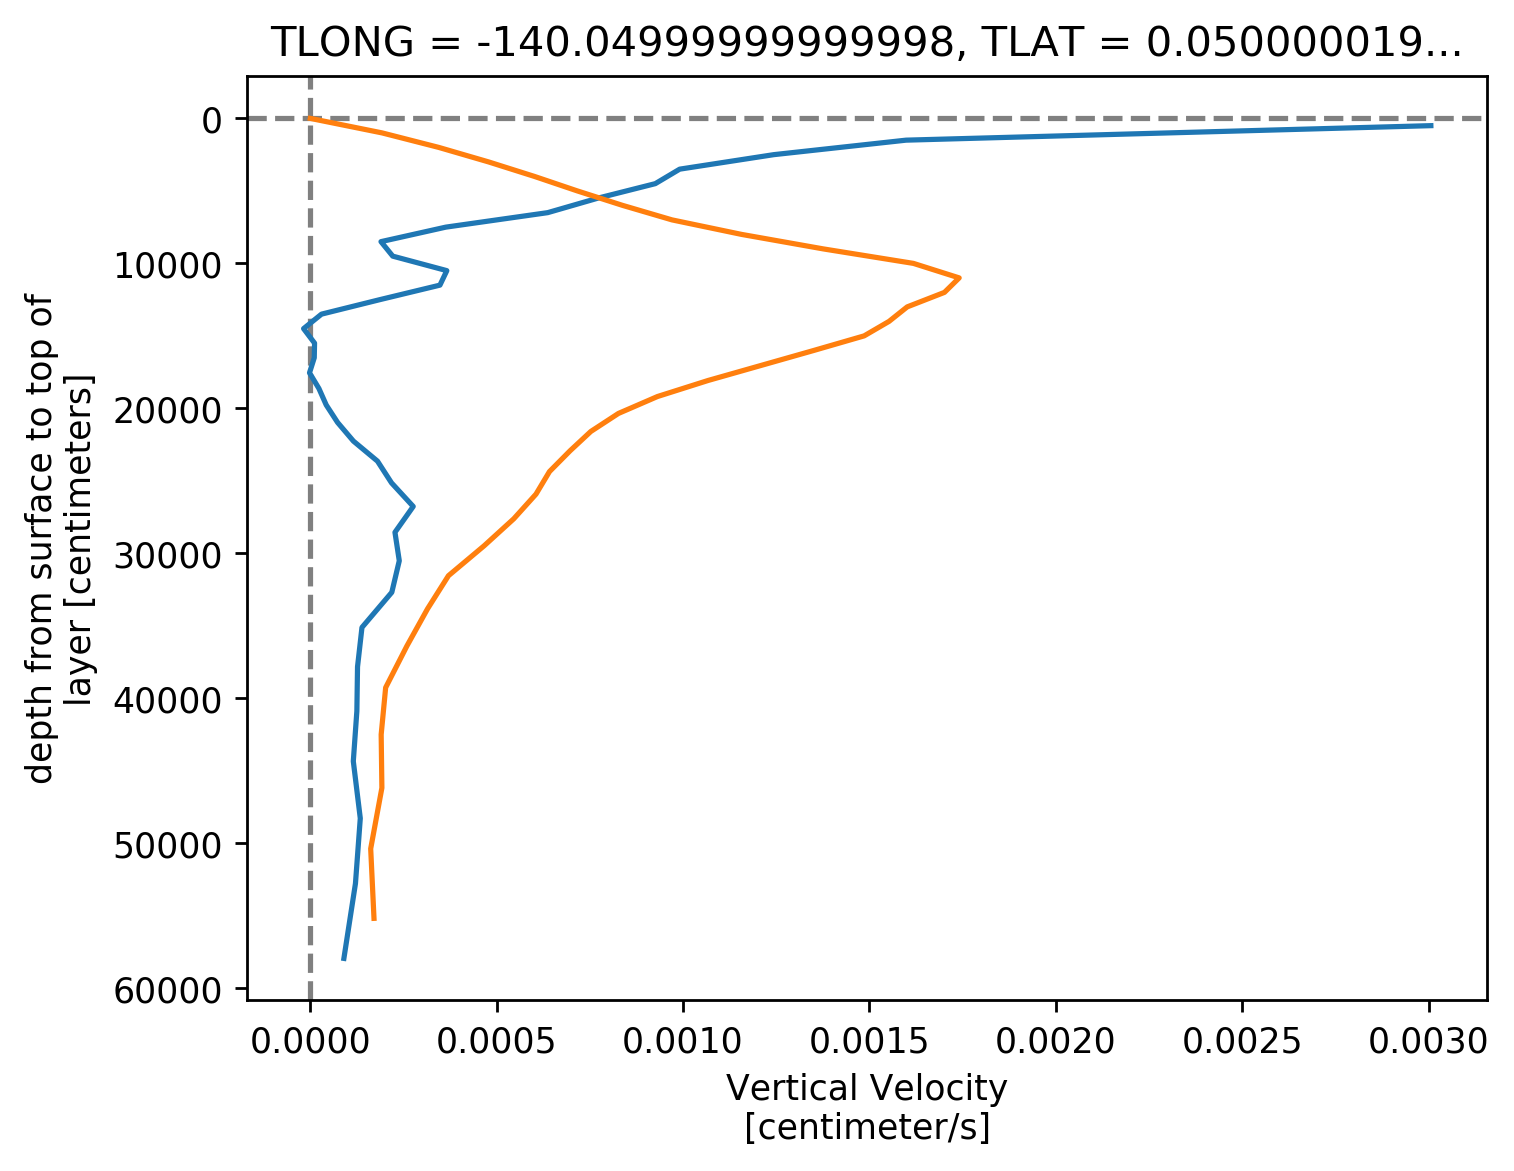

In [ ]:
wd_eq.mean('time').sel(nlon_t=-140, method='nearest').plot(y='z_t')
cesm_eq_mean.w.sel(nlon_t=-140, method='nearest').plot(y='z_w', yincrease=False)
dcpy.plots.liney(0)
dcpy.plots.linex(0)

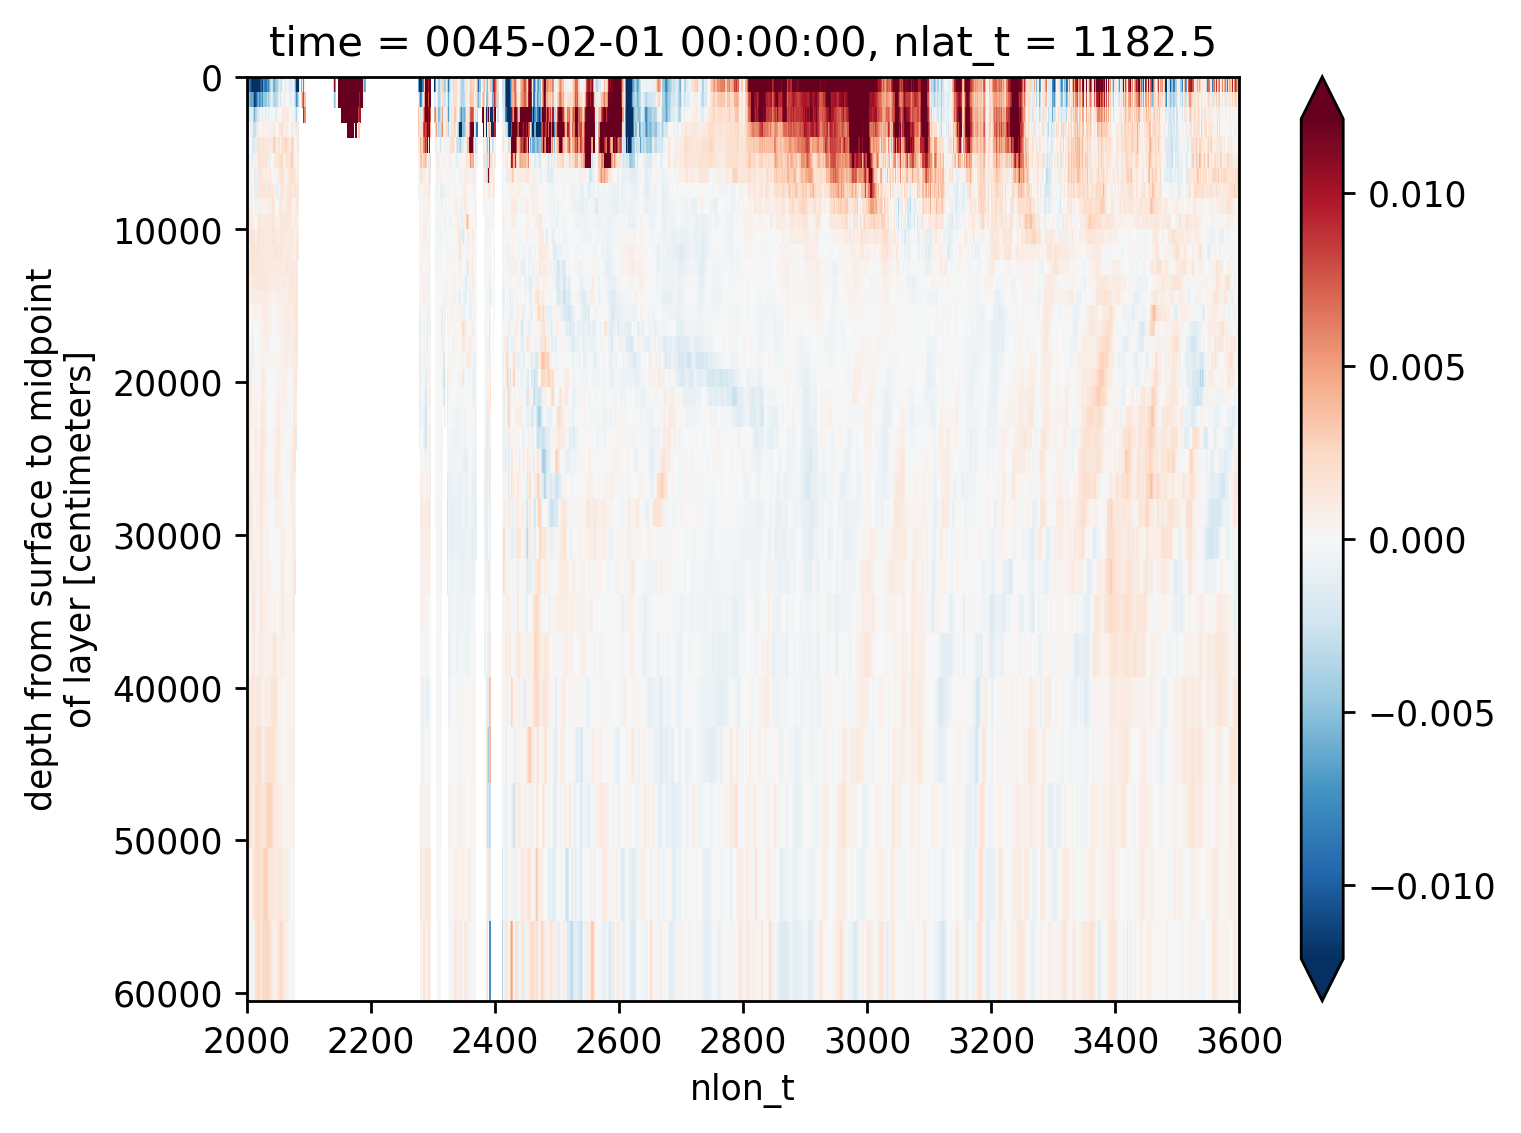

In [ ]:
wd.isel(time=0, nlat_t=62, z_t=slice(0, 35)).plot(robust=True, yincrease=False)

In [ ]:
wmean = cesm.w.isel(nlat_t=62).mean('time').compute()

/gpfs/u/home/dcherian/python/xarray/xarray/core/nanops.py:157: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


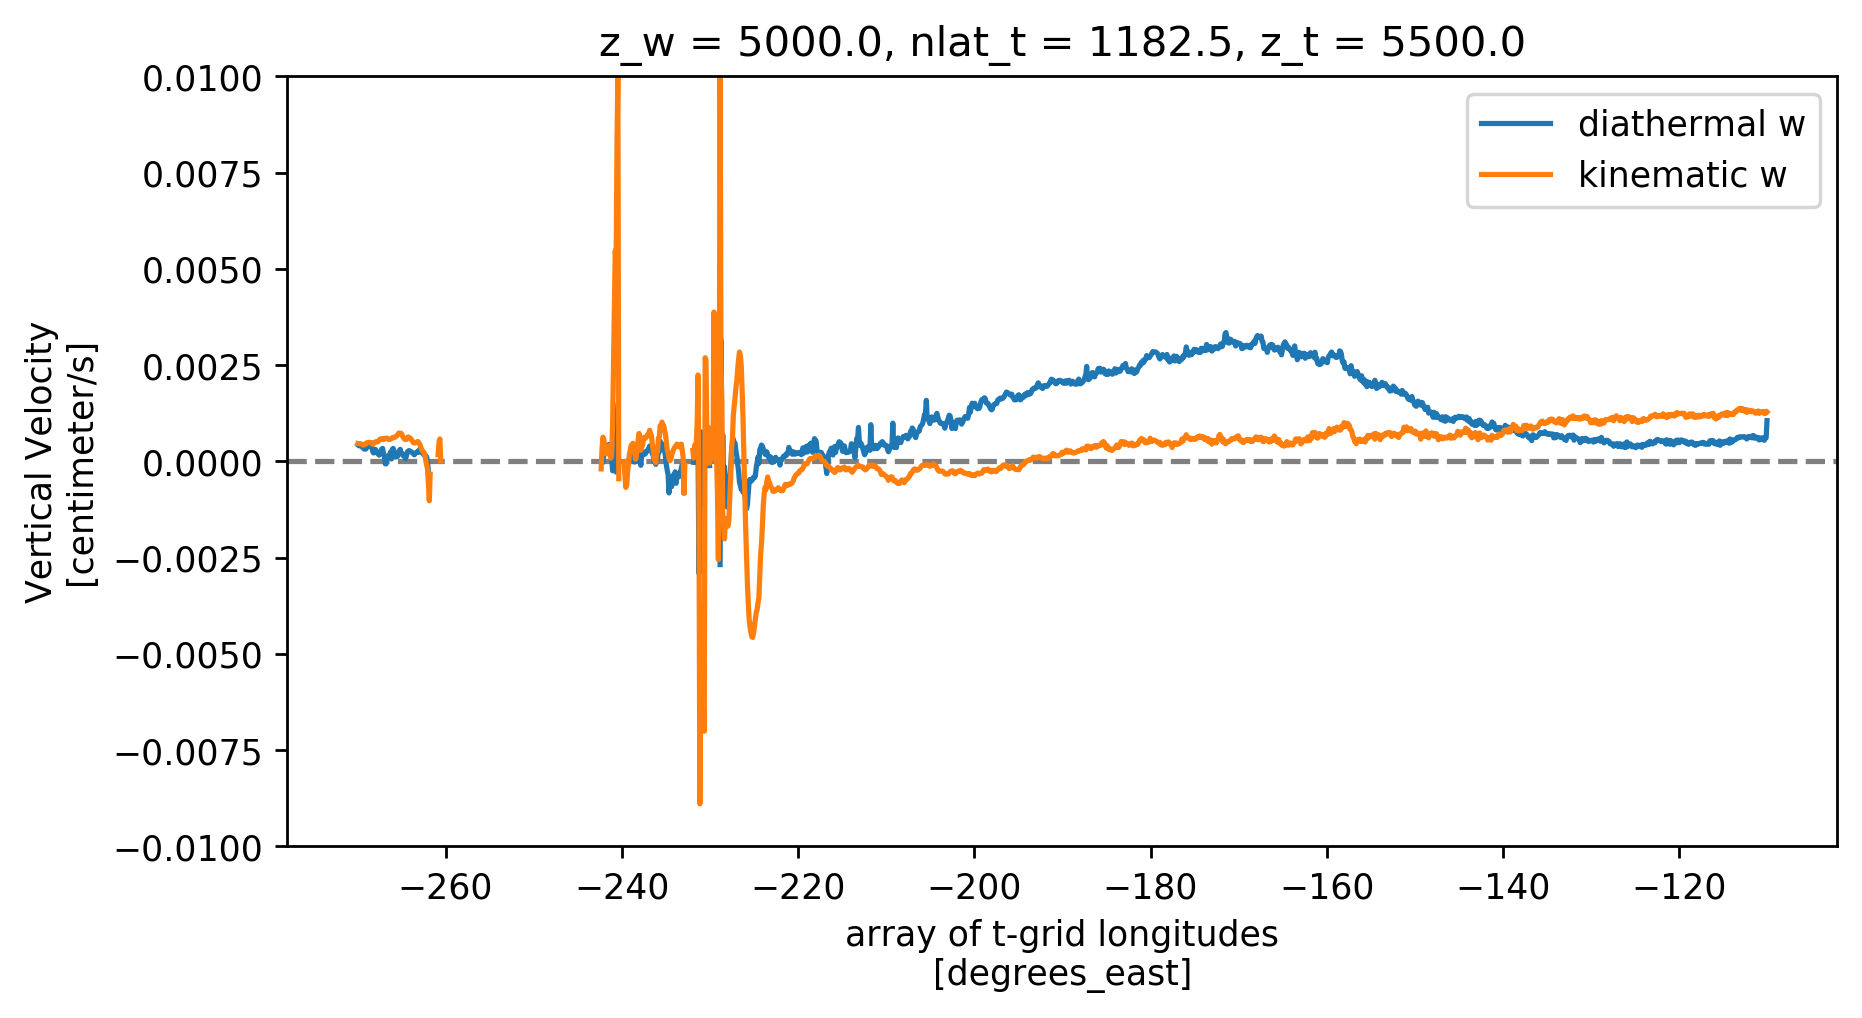

In [ ]:
wbar = wd_eq.mean('time').sel(z_t=5000, method='nearest')
wbar = wbar.assign_coords(nlon_t=wbar.TLONG)
wbar.plot(label='diathermal w')
wmean.sel(z_w=5000).assign_coords(nlon_t=wbar.TLONG).plot(ylim=[-1e-2, 1e-2], label='eulerian w')
dcpy.plots.liney(0)
plt.gca().legend()
plt.gcf().set_size_inches((8, 4))

In [ ]:
cluster.scale(24)

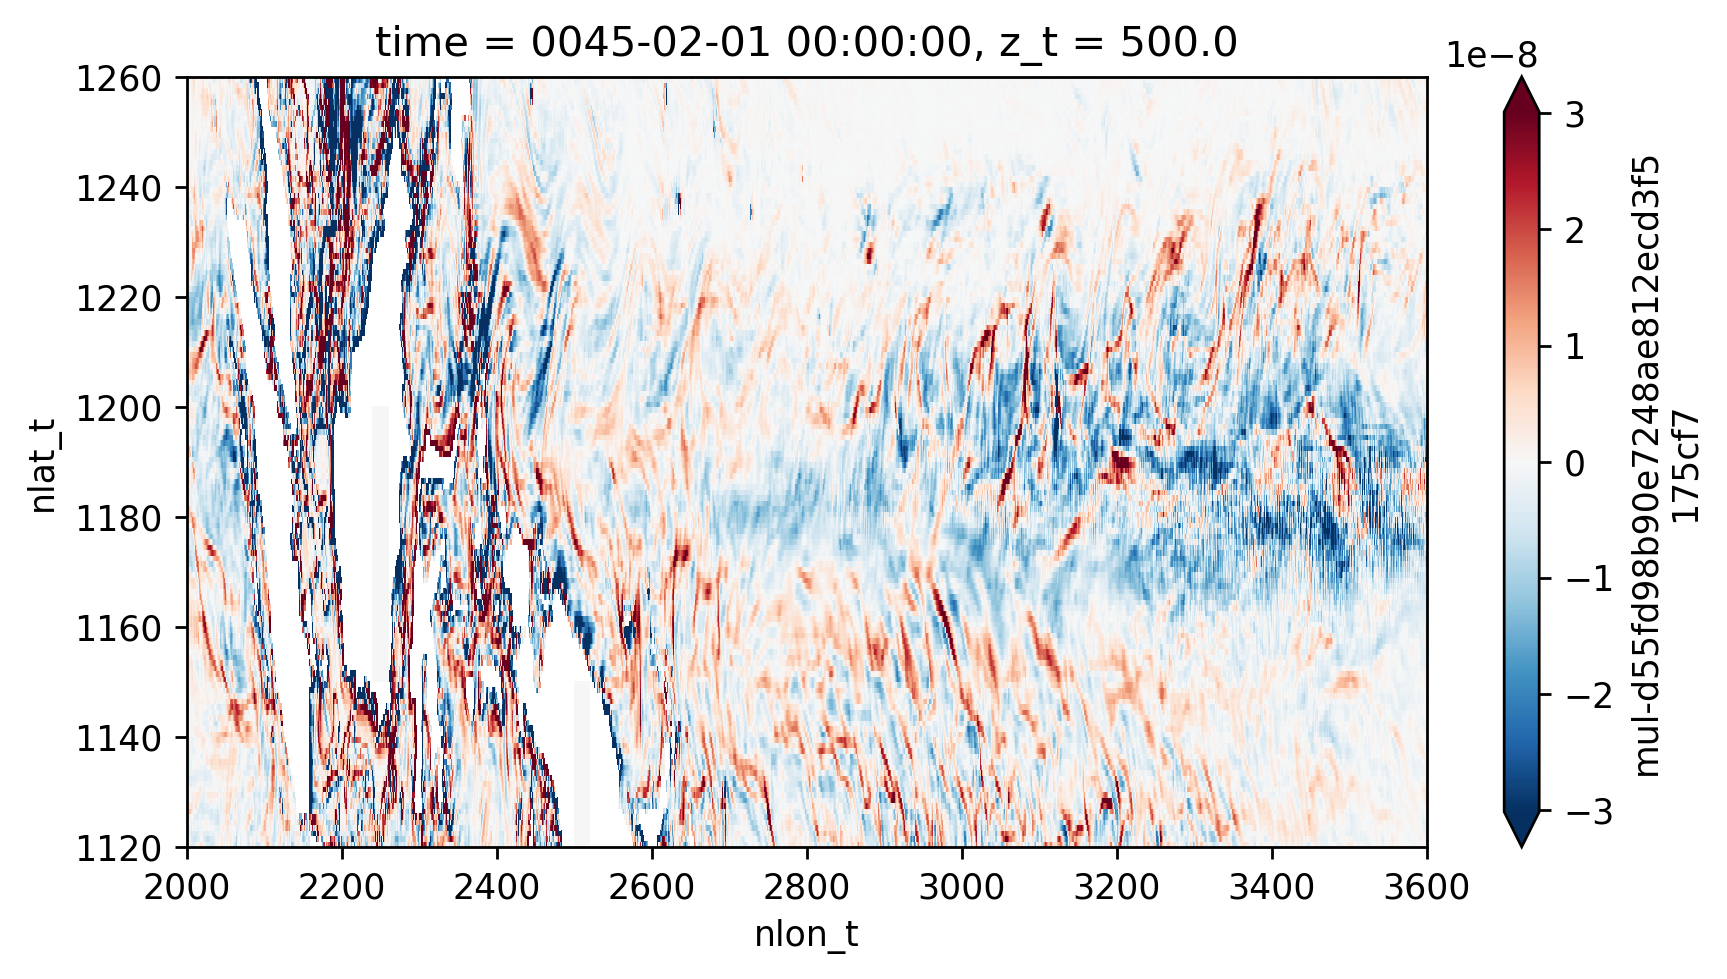

In [ ]:
(wTz).isel(z_t=0, time=0).plot(robust=True)
plt.gcf().set_size_inches((8, 4))

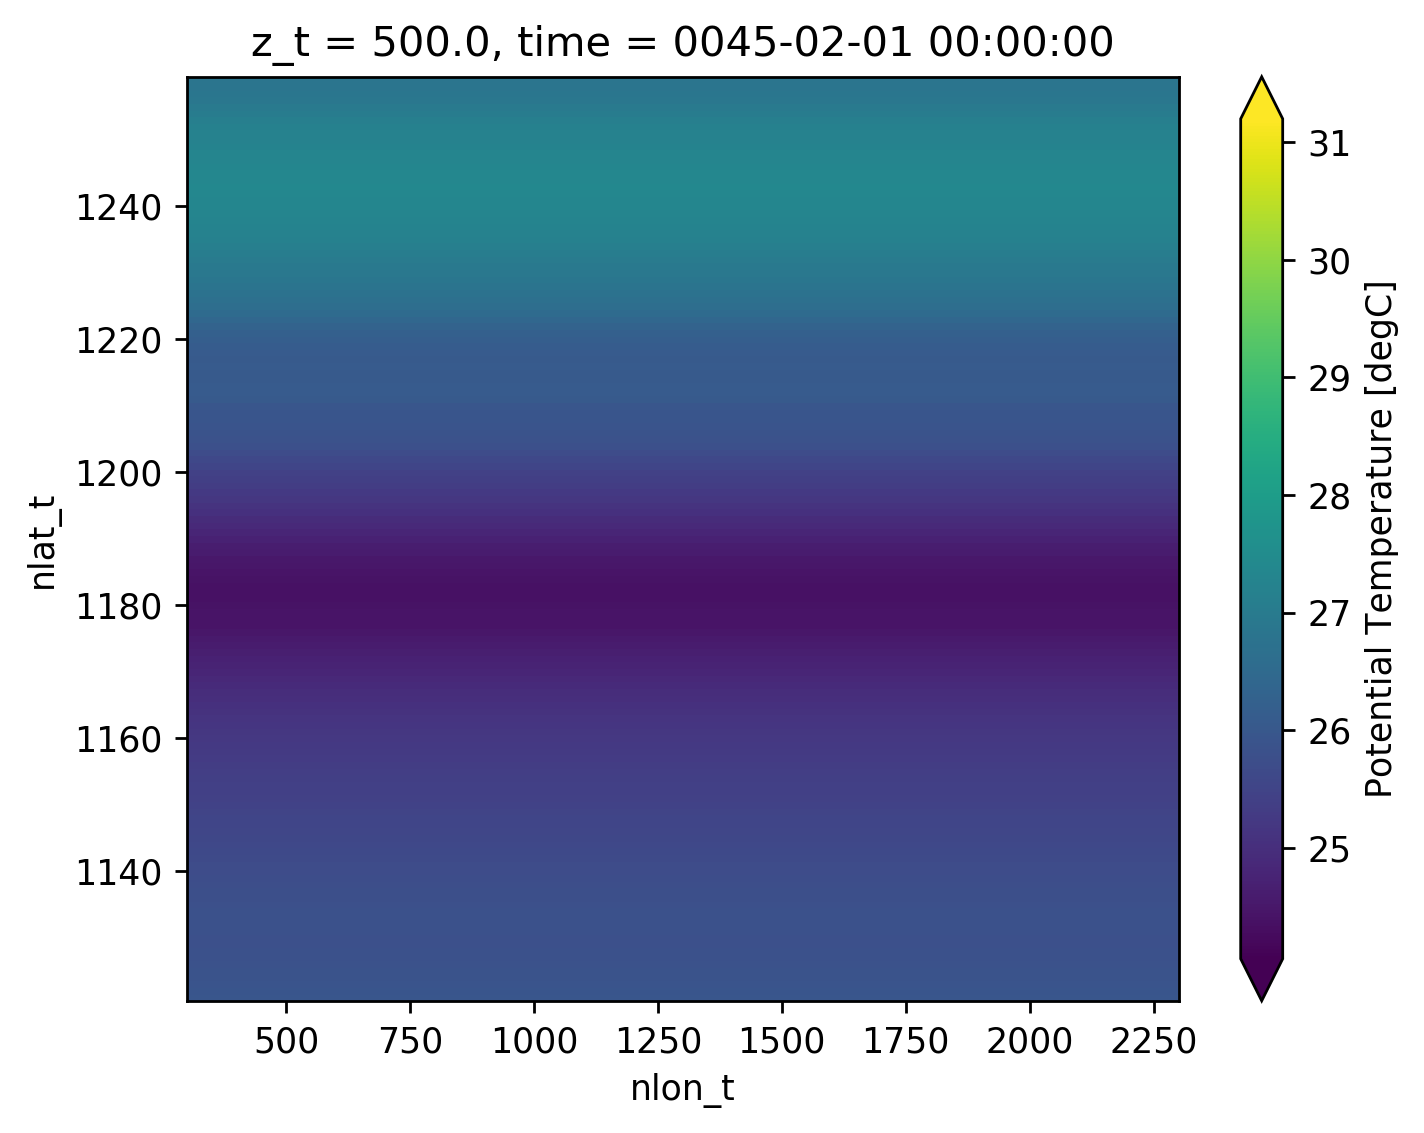

In [ ]:
cesm.temp.isel(z_t=0, time=0).plot(infer_intervals=False, robust=True)

# Estimate terms